In [3]:
# Very simple: pick a .txt, show raw contents, then show it again with skiprows=7
import pandas as pd
import numpy as np
import os, re
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename

In [186]:
# Base folder (up to, but not including, the numeric ID)
BASE_HIT_DIR = r"C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\CWRU\test11_twoCH_High Flow_30 gm per sec_Yes Chiller_Single Phase"

# Ask for numeric ID (e.g., 30)
run_id = input("Enter numeric ID (e.g., 30): ").strip()

# Simple guard: keep only digits
if not run_id.isdigit():
    raise ValueError("Please enter digits only (e.g., 30).")

# Build: ...\<ID>\Plot_Hit
plots_folder_Hit = os.path.join(BASE_HIT_DIR, run_id, "Plot_Hit")
os.makedirs(plots_folder_Hit, exist_ok=True)

print("Plots will be saved to:", plots_folder_Hit)

# === 1) Helper: safe filenames ===
def _safe(name: str) -> str:
    name = re.sub(r"[^\w\-. ]+", "_", str(name)).strip()
    name = re.sub(r"\s+", "_", name)
    return name[:200]  # truncate just in case

# === 2) Collect figures to save ===
saved_figures = []
fig_idx = 1  # serial number

Plots will be saved to: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\CWRU\test11_twoCH_High Flow_30 gm per sec_Yes Chiller_Single Phase\25\Plot_Hit


In [187]:
# Step 1: Prompt user to select a .txt file
Tk().withdraw()  # Hide the root Tkinter window
file_path = askopenfilename(title="Select a Hit.txt file", filetypes=[("Text files", "*.txt")])

In [188]:

if not file_path:
    print("No file selected.")
else:
    # 2) Your 21 column names (SIG STRNGTH is ONE column)
    # “SIG STRNGTH” is one single column name, the simplest fix is to skip the header row entirely and supply your own names.
    col_names = [
        "ID", "SSSSSSSS.mmmuuun", "PARA1", "PARA2", "CH", "RISE", "COUN", "ENER",
        "DURATION", "A-FRQ", "RMS", "PCNTS", "THR", "R-FRQ", "I-FRQ",
        "SIG STRNGTH", "ABS-ENERGY", "FRQ-C", "P-FRQ", "AMP", "ASL"
    ]

# 3) Read: skip 7 preamble lines + the column header line itself
    df = pd.read_csv(
        file_path,
        skiprows=8,             # <- key change
        header=None,            # don't use the file's header row
        names=col_names,        # apply your 21 names
        delim_whitespace=True,  # columns are space-aligned
        engine="python"
    )

# 4) Show heads/tails and keep df for plotting later
    print(f"\nLoaded df: {df.shape[0]} rows × {df.shape[1]} cols")
    print("\n--- df.head() ---")
    print(df.head())
    print("\n--- df.tail() ---")
    print(df.tail())

C:\Users\mh272\AppData\Local\Temp\ipykernel_10088\981812674.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(



Loaded df: 84016 rows × 21 cols

--- df.head() ---
   ID  SSSSSSSS.mmmuuun   PARA1   PARA2  CH  RISE  COUN  ENER  DURATION  \
0   1          0.000056  0.0179  0.0166   2   201     3     0       343   
1   1          0.001154  0.0179  0.0166   2     1     1     0         1   
2   1          0.001537  0.0180  0.0165   1   147     1     0       167   
3   1          0.001669  0.0180  0.0165   2   174     2     0       256   
4   1          0.002449  0.0180  0.0169   2   104     2     0       284   

   A-FRQ  ...  PCNTS  THR  R-FRQ  I-FRQ  SIG STRNGTH  ABS-ENERGY  FRQ-C  \
0      9  ...      2   25      7      9       2971.0       4.849    116   
1   1000  ...      1   25      0   1000       2971.0       0.000    150   
2      6  ...      1   25      0      6       1540.0       2.161    143   
3      8  ...      1   25     12      5       1522.0       2.074    134   
4      7  ...      1   25      5      9       1803.0       2.430    133   

   P-FRQ   AMP   ASL  
0      3  29.2  20.8  


In [189]:
df_1 = df.loc[df["CH"] == 1].reset_index(drop=True).copy()
df_1 = df_1.drop(columns=["PARA2"])

df_2 = df.loc[df["CH"] == 2].reset_index(drop=True).copy()
df_2 = df_2.drop(columns=["PARA1"])

# quick peek
print(f"\nLoaded df_1: {df_1.shape[0]} rows × {df_1.shape[1]} cols")
print("df_1:", df_1.shape)
print(df_1.head(3))
print(f"\nLoaded df_1: {df_2.shape[0]} rows × {df_2.shape[1]} cols")
print("\ndf_2:", df_2.shape)
print(df_2.head(3))


Loaded df_1: 30188 rows × 20 cols
df_1: (30188, 20)
   ID  SSSSSSSS.mmmuuun   PARA1  CH  RISE  COUN  ENER  DURATION  A-FRQ  RMS  \
0   1          0.001537  0.0180   1   147     1     0       167      6  0.0   
1   1          0.002551  0.0180   1     5     1     0         9    111  0.0   
2   1          0.005823  0.0177   1   164     1     0       164      6  0.0   

   PCNTS  THR  R-FRQ  I-FRQ  SIG STRNGTH  ABS-ENERGY  FRQ-C  P-FRQ   AMP   ASL  
0      1   25      0      6      1540.00    2.161000    143      3  26.5  18.7  
1      1   25      0    200       152.50    0.335160    139      2  27.1  18.7  
2      1   25      0      6       814.35    0.877002    146      3  25.2  18.7  

Loaded df_1: 53828 rows × 20 cols

df_2: (53828, 20)
   ID  SSSSSSSS.mmmuuun   PARA2  CH  RISE  COUN  ENER  DURATION  A-FRQ  RMS  \
0   1          0.000056  0.0166   2   201     3     0       343      9  0.0   
1   1          0.001154  0.0166   2     1     1     0         1   1000  0.0   
2   1          

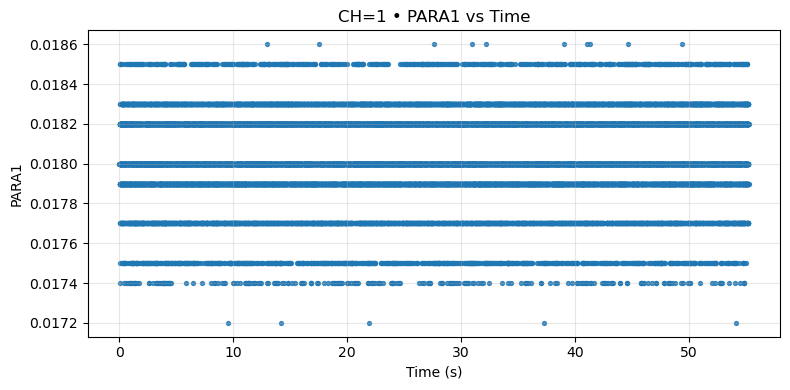

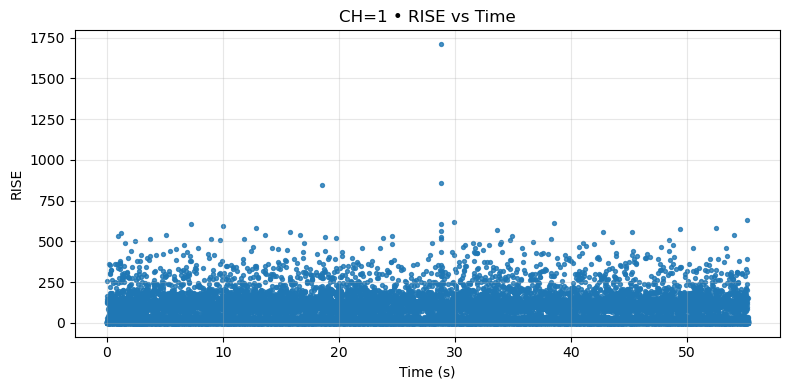

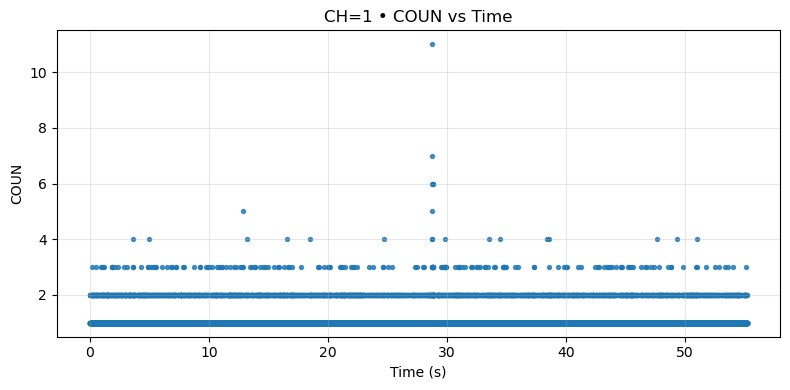

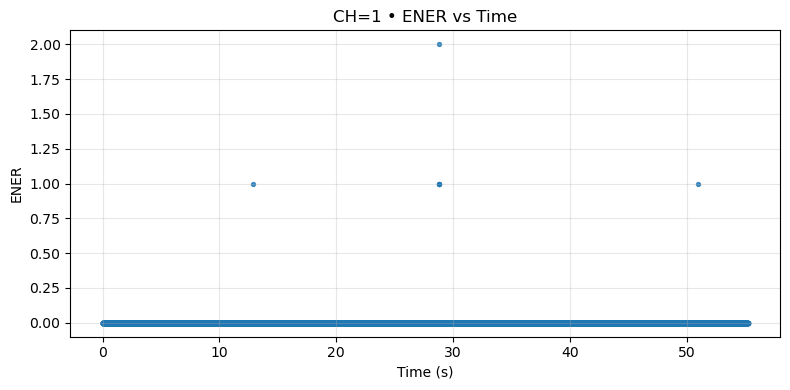

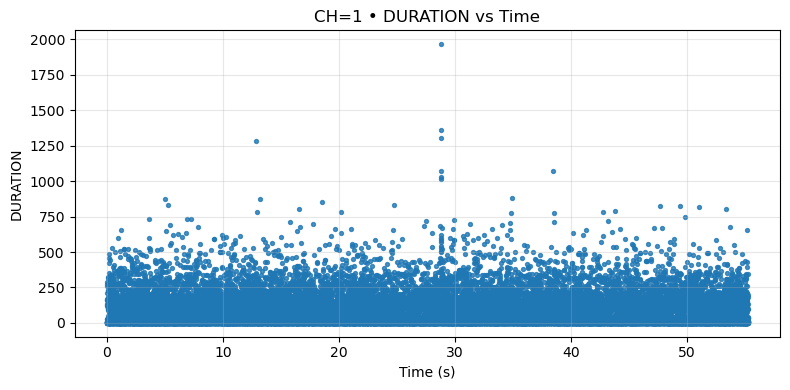

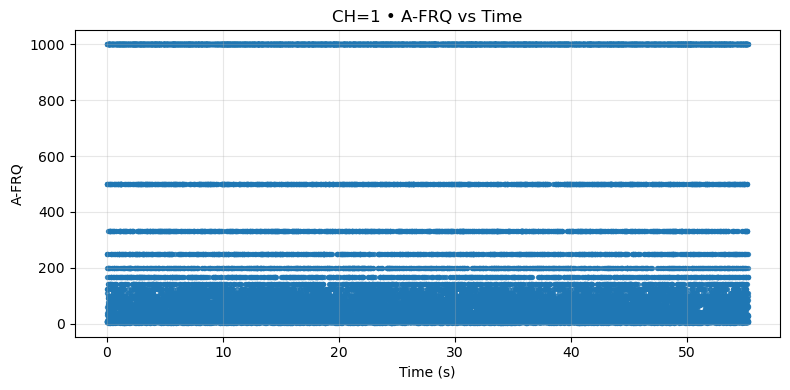

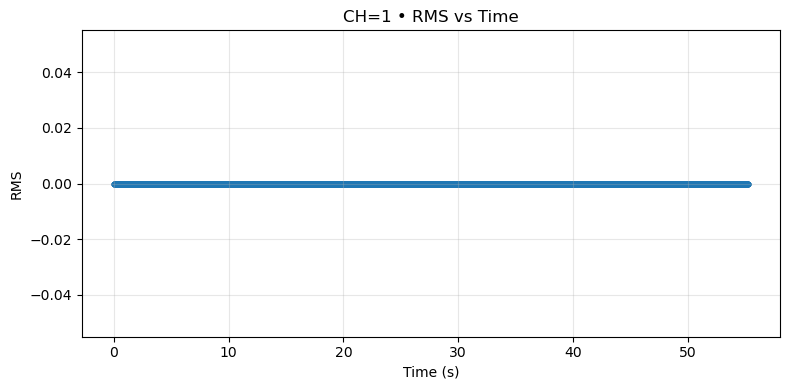

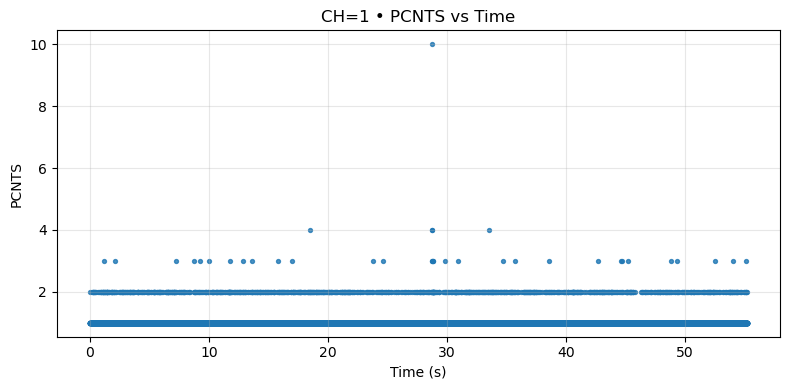

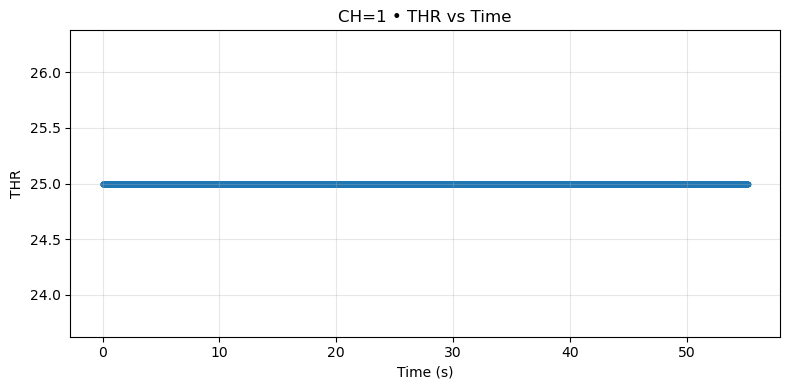

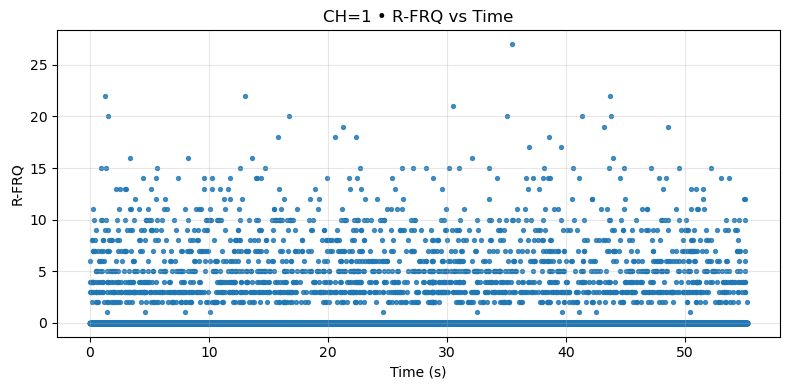

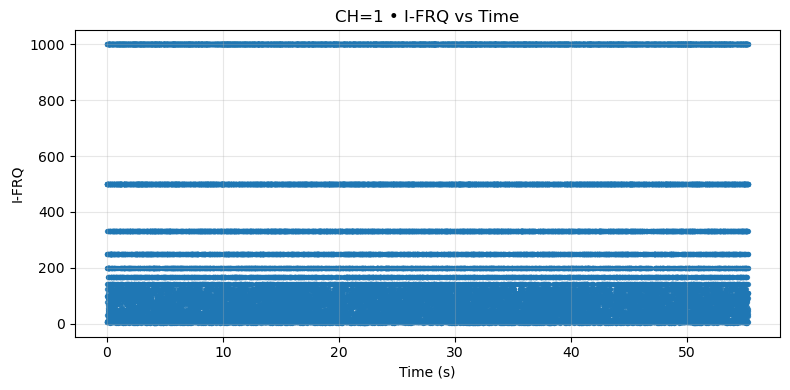

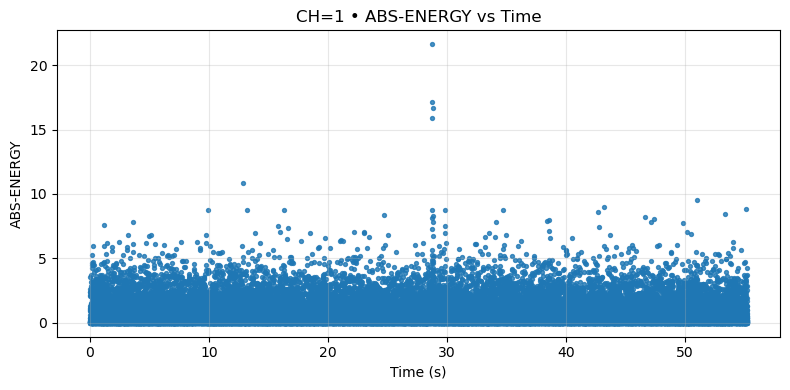

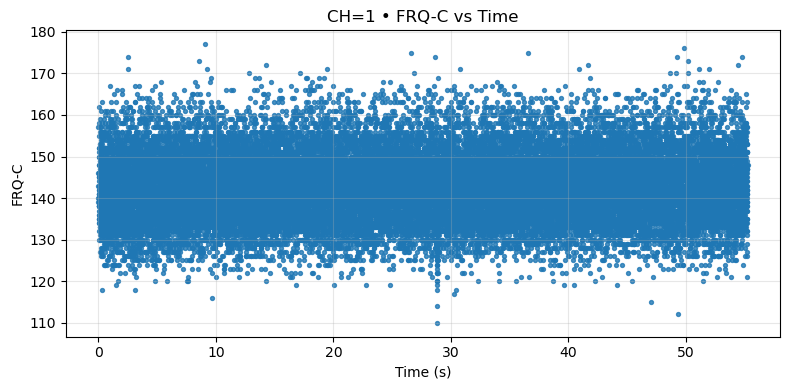

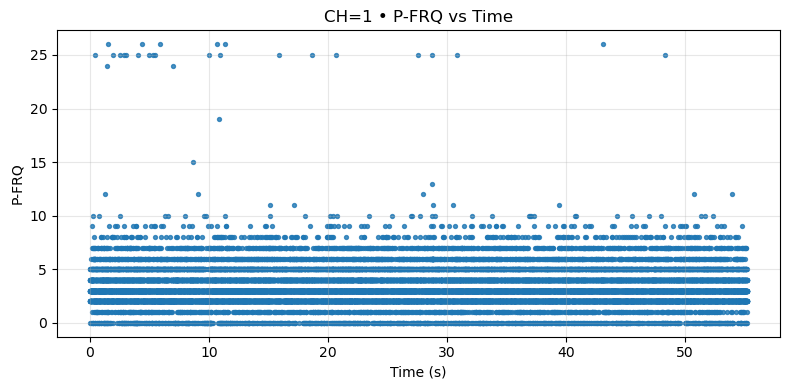

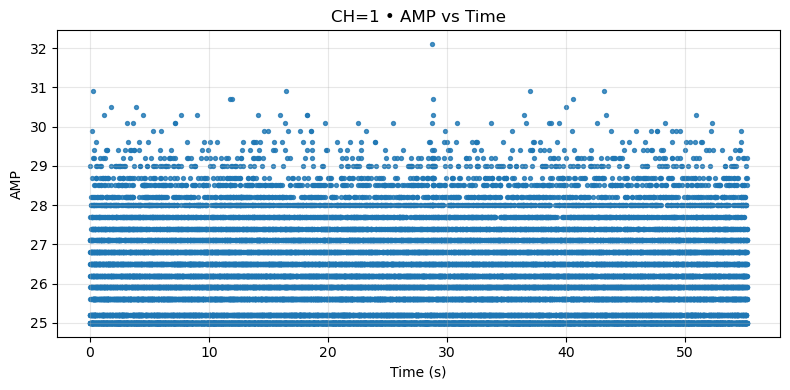

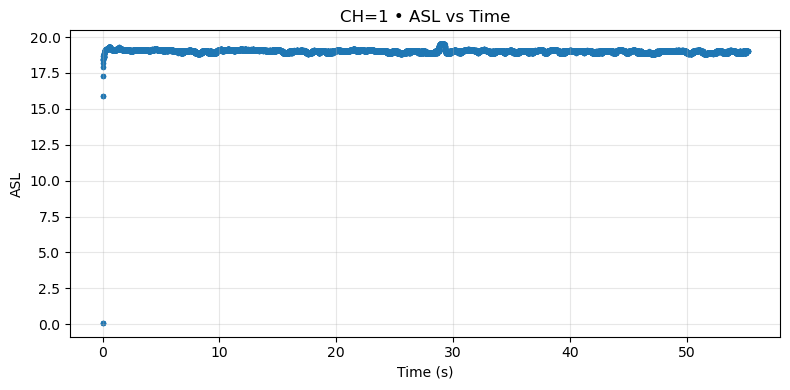

In [190]:
# Single channel plotting from a two channel Hit.txt file

time_col = "SSSSSSSS.mmmuuun"
metrics  = ["PARA1","RISE","COUN","ENER","DURATION","A-FRQ","RMS","PCNTS","THR","R-FRQ","I-FRQ","ABS-ENERGY","FRQ-C","P-FRQ","AMP","ASL"]

# sort by time once
t = pd.to_numeric(df_1[time_col], errors="coerce")
order = np.argsort(t.values)
t_sorted = t.values[order]

POINT_SIZE = 8          # marker size (area, in points^2)
POINT_COLOR = "tab:blue" # e.g., "red", "#1f77b4", "tab:orange"
MARKER = "o"             # 'o', 's', '^', 'x', '*', etc.

for col in metrics:
    y = pd.to_numeric(df_1[col], errors="coerce").values[order]

    plt.figure(figsize=(8, 4))
    plt.scatter(t_sorted, y, s=POINT_SIZE, color=POINT_COLOR, marker=MARKER, alpha=0.8)
    plt.xlabel("Time (s)")
    plt.ylabel(col)
    plt.title(f"CH=1 • {col} vs Time")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

plt.show()

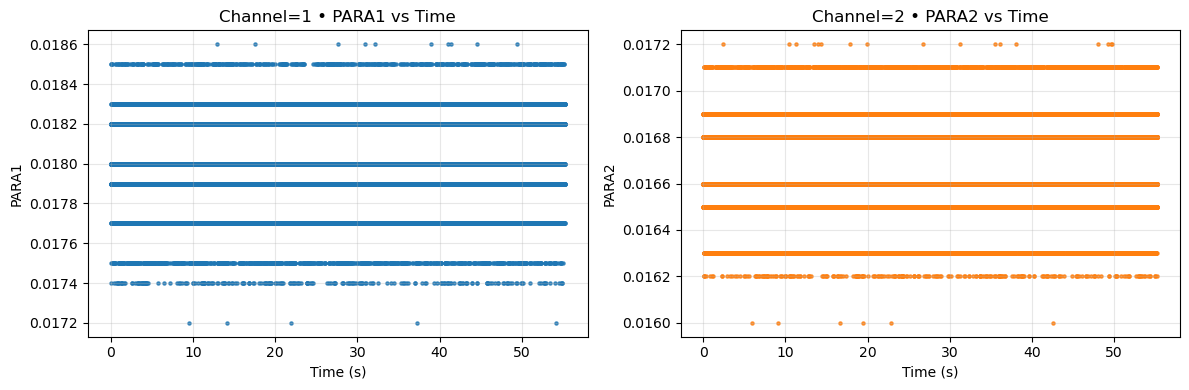

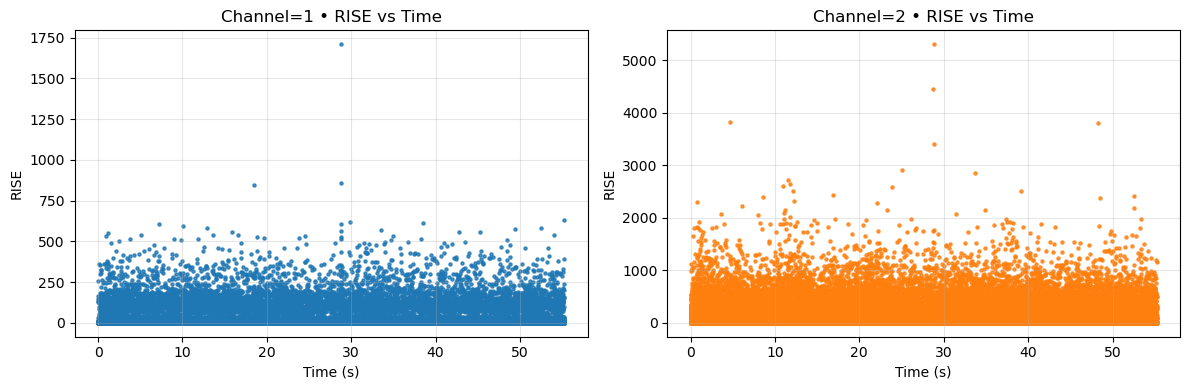

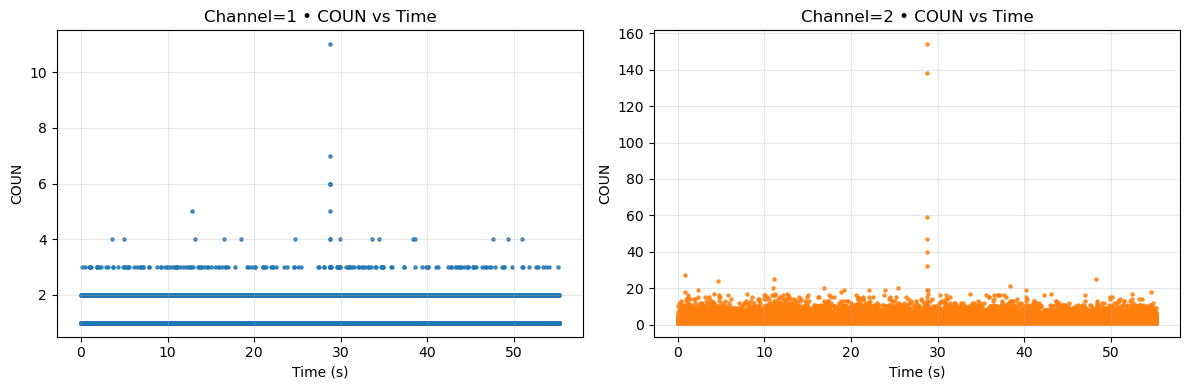

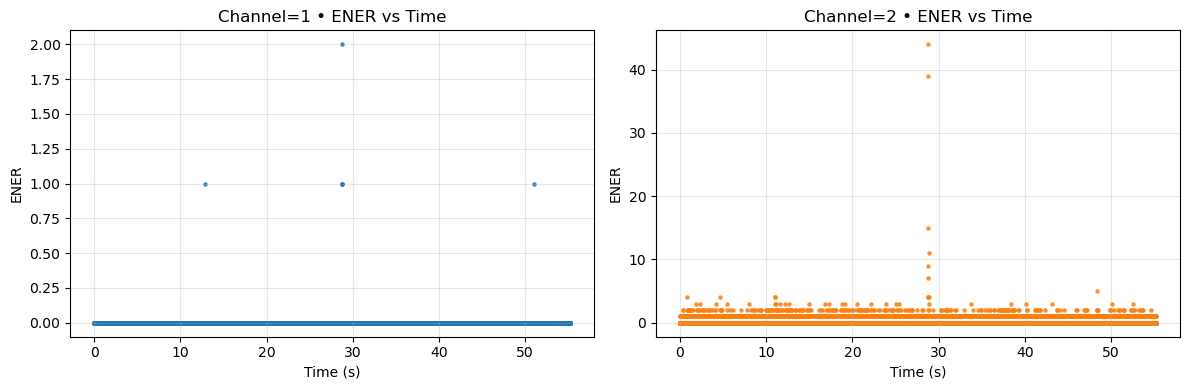

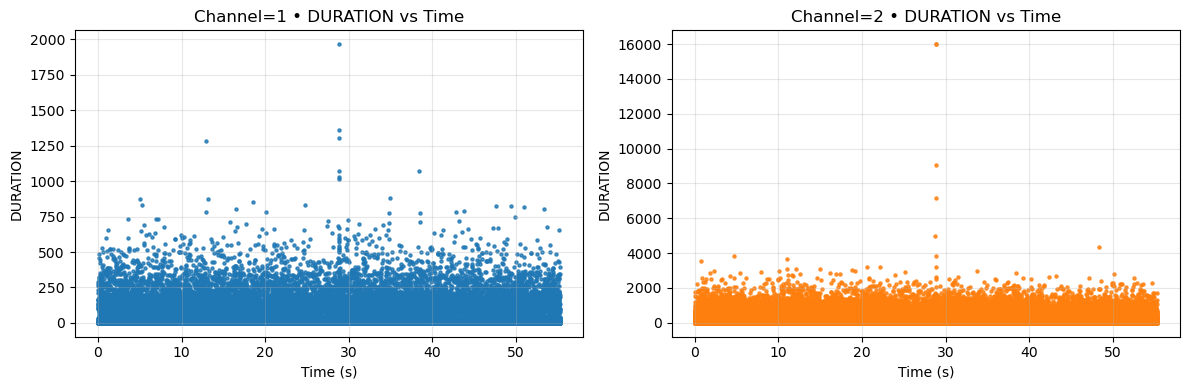

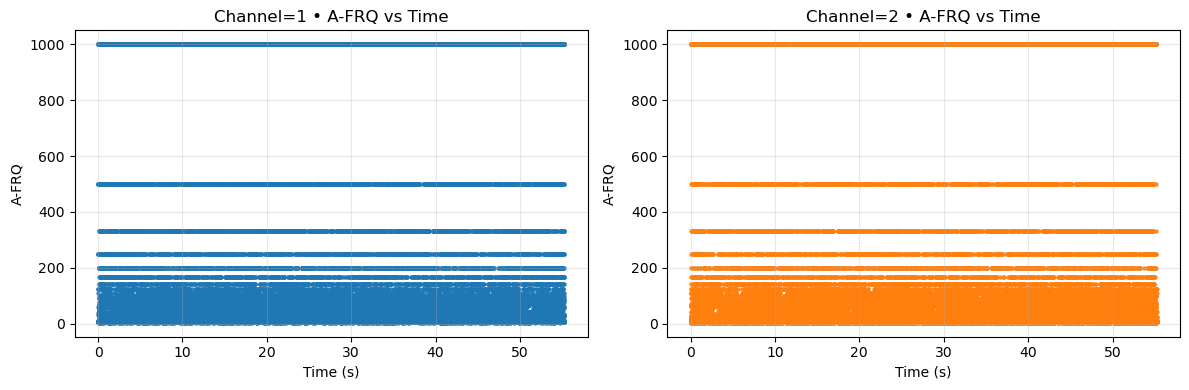

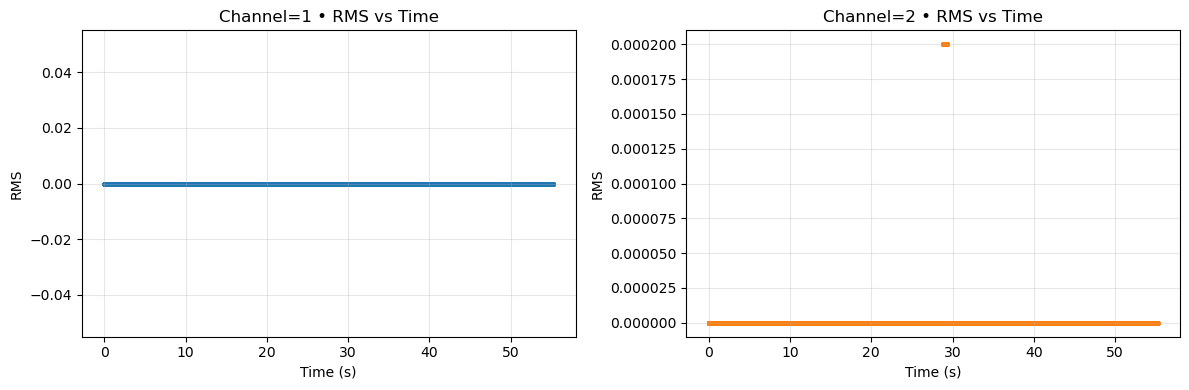

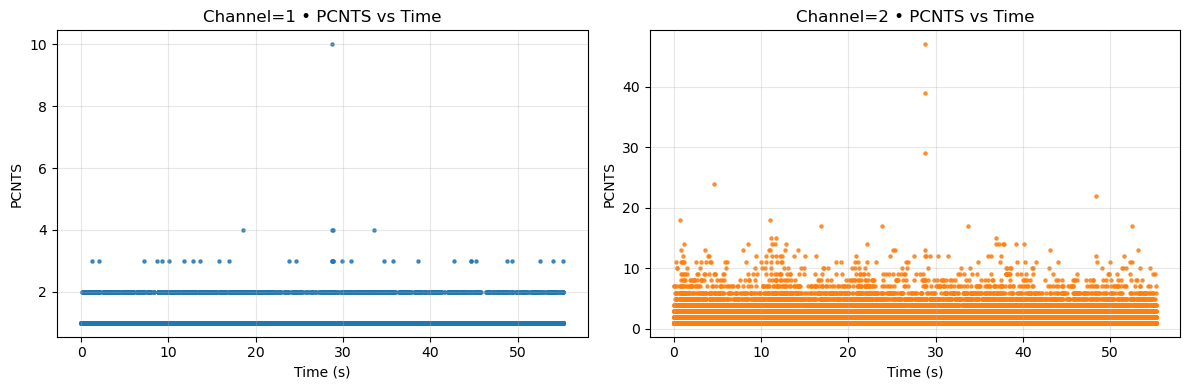

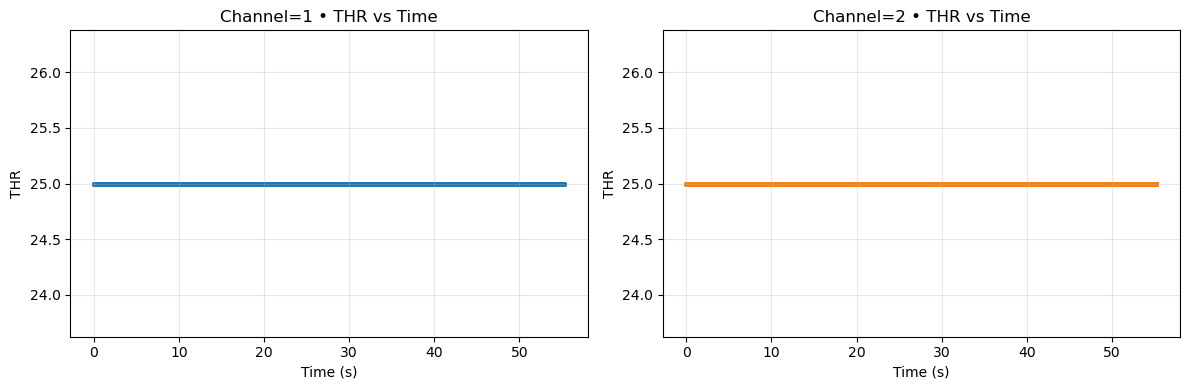

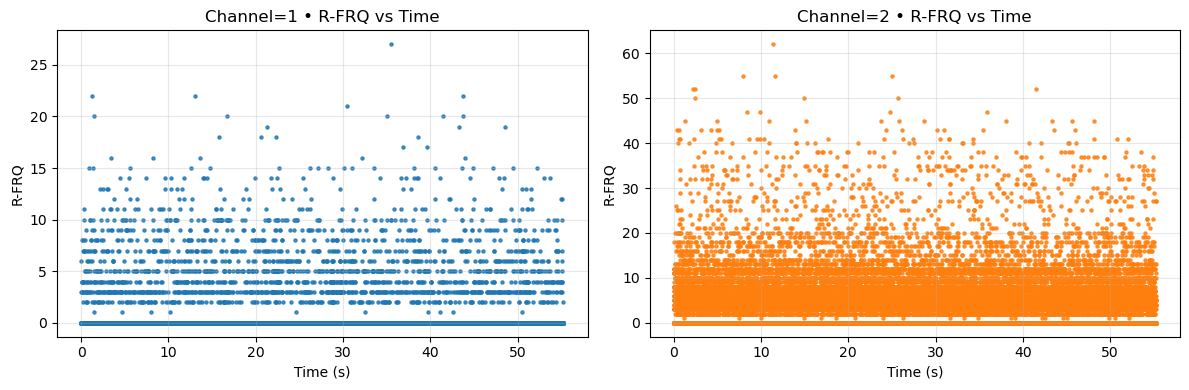

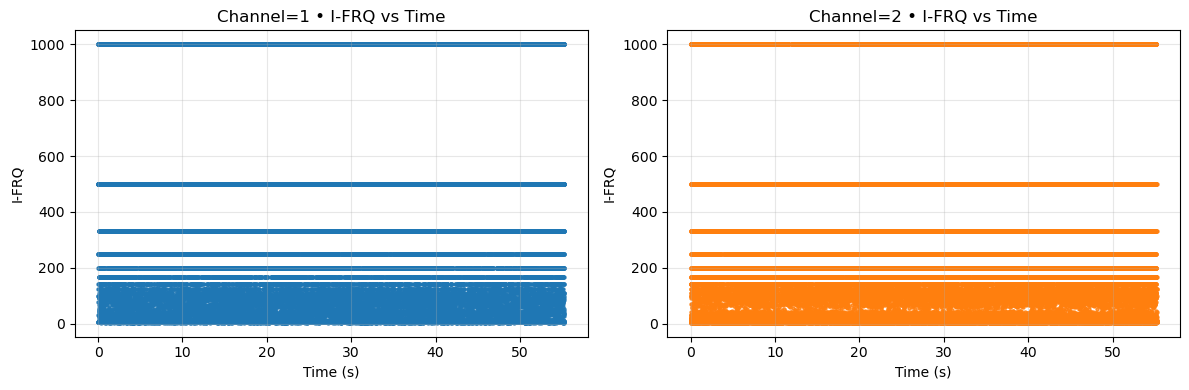

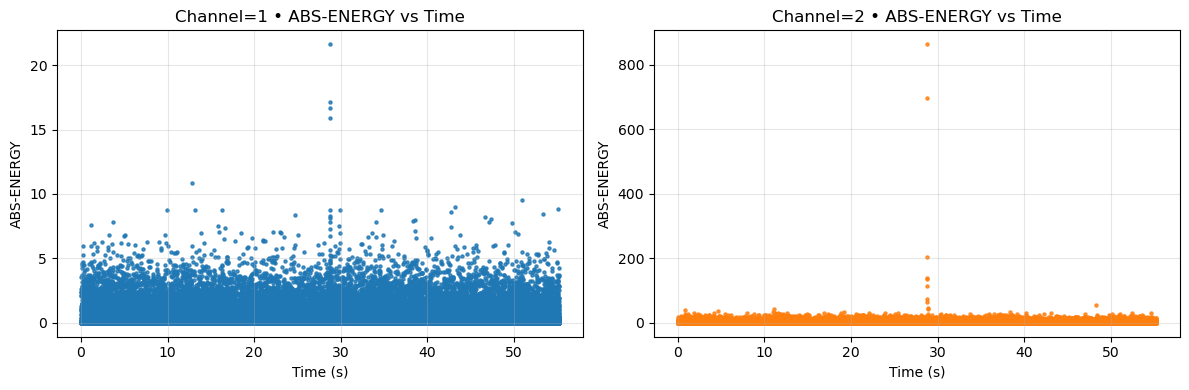

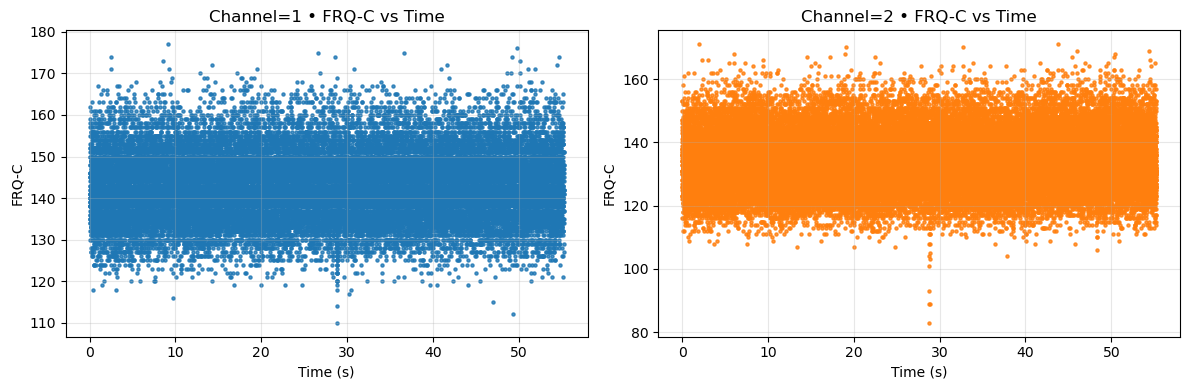

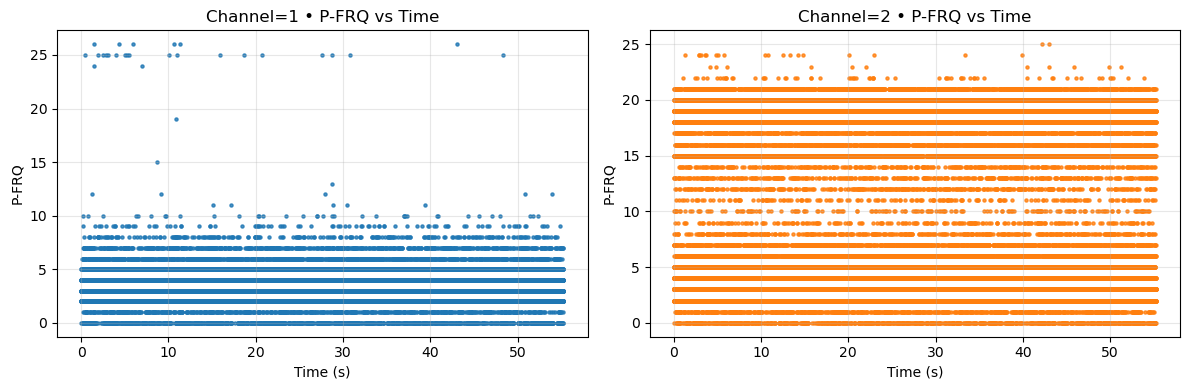

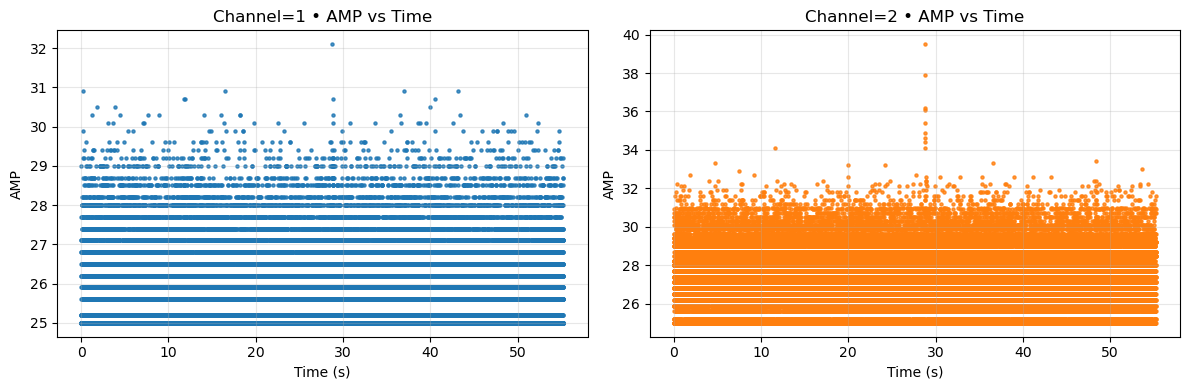

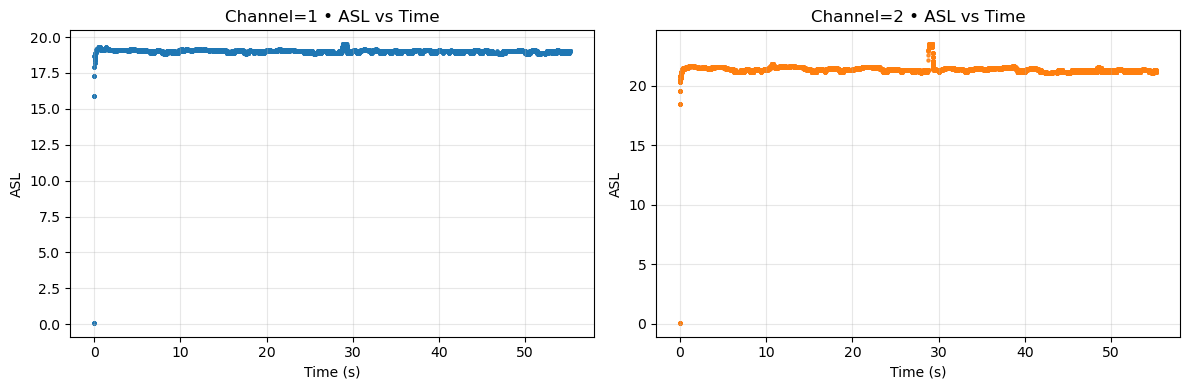

In [191]:
time_col = "SSSSSSSS.mmmuuun"

# Metrics
metrics1 = ["PARA1","RISE","COUN","ENER","DURATION","A-FRQ","RMS","PCNTS",
            "THR","R-FRQ","I-FRQ","ABS-ENERGY","FRQ-C","P-FRQ","AMP","ASL"]
metrics2 = ["PARA2","RISE","COUN","ENER","DURATION","A-FRQ","RMS","PCNTS",
            "THR","R-FRQ","I-FRQ","ABS-ENERGY","FRQ-C","P-FRQ","AMP","ASL"]

# Style controls (you can make them the same if you want)
POINT_SIZE_1  = 5
POINT_COLOR_1 = "tab:blue"
MARKER_1      = "o"

POINT_SIZE_2  = 5
POINT_COLOR_2 = "tab:orange"
MARKER_2      = "o"

# Sort by time for each dataframe
t1 = pd.to_numeric(df_1[time_col], errors="coerce")
o1 = np.argsort(t1.values)
t1_sorted = t1.values[o1]

t2 = pd.to_numeric(df_2[time_col], errors="coerce")
o2 = np.argsort(t2.values)
t2_sorted = t2.values[o2]

# Plot each metric side-by-side
for col1, col2 in zip(metrics1, metrics2):
    y1 = pd.to_numeric(df_1[col1], errors="coerce").values[o1]
    y2 = pd.to_numeric(df_2[col2], errors="coerce").values[o2]

    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=False, sharey=False)

    # Left: df_1 (CH=1)
    axes[0].scatter(t1_sorted, y1, s=POINT_SIZE_1, color=POINT_COLOR_1, marker=MARKER_1, alpha=0.8)
    axes[0].set_xlabel("Time (s)")
    axes[0].set_ylabel(col1)
    axes[0].set_title(f"Channel=1 • {col1} vs Time")
    axes[0].grid(True, alpha=0.3)

    # Right: df_2 (CH=2)
    axes[1].scatter(t2_sorted, y2, s=POINT_SIZE_2, color=POINT_COLOR_2, marker=MARKER_2, alpha=0.8)
    axes[1].set_xlabel("Time (s)")
    axes[1].set_ylabel(col2)
    axes[1].set_title(f"Channel=2 • {col2} vs Time")
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    saved_figures.append((f"{fig_idx:02d}_{col1}_vs_Time_CH1_CH2", plt.gcf()))
    fig_idx += 1
    plt.show()

In [192]:
# === 3) Save all queued figures ===
for name, fig in saved_figures:
    filename = os.path.join(plots_folder_Hit, f"{_safe(name)}.png")
    fig.savefig(filename, dpi=300, bbox_inches="tight")
    print("✅ Saved:", filename)

✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\CWRU\test11_twoCH_High Flow_30 gm per sec_Yes Chiller_Single Phase\25\Plot_Hit\01_PARA1_vs_Time_CH1_CH2.png
✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\CWRU\test11_twoCH_High Flow_30 gm per sec_Yes Chiller_Single Phase\25\Plot_Hit\02_RISE_vs_Time_CH1_CH2.png
✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\CWRU\test11_twoCH_High Flow_30 gm per sec_Yes Chiller_Single Phase\25\Plot_Hit\03_COUN_vs_Time_CH1_CH2.png
✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\CWRU\test11_twoCH_High Flow_30 gm per sec_Yes Chiller_Single Phase\25\Plot_Hit\04_ENER_vs_Time_CH1_CH2.png
✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\CWRU\test11_twoCH_High Flow_30 gm per sec_Yes Chiller_Single Phase\25\Plot_Hit\05_DURATION_vs_Time_CH1_CH2.png
✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\CWRU\test11_twoCH_High Flow_30 gm per sec_Yes Chiller_Single Phase\25\Plot_Hit\06_A-FRQ_vs_Time_CH1_CH2.png
✅ Saved: C:\Users\mh272\Box\

In [193]:
Tk().withdraw()
file_path = askopenfilename(title="Select the dual-channel time .txt", filetypes=[("Text files", "*.txt")])

In [194]:
plots_folder_Time = os.path.join(BASE_HIT_DIR, run_id, "Plot_Time")
os.makedirs(plots_folder_Time, exist_ok=True)

# === 2) Collect figures to save ===
saved_figures = []
fig_idx = 1  # serial number

In [195]:
import pandas as pd

def parse_dual_time_simple(file_path):
    # storage for CH=1
    t1, p1, rms1, thr1, ae1, asl1 = [], [], [], [], [], []
    # storage for CH=2
    t2, p2, rms2, thr2, ae2, asl2 = [], [], [], [], [], []

    def extract_block(s, tag):
        # s has "... 1:[ a b c d ]  2:[ a b c d ] ..."
        # return (RMS, THR, ABS-ENERGY, ASL) for the given tag ("1:[" or "2:[")
        k = s.find(tag)
        s = s[k+3:]                     # skip '1:[' or '2:['
        s = s.split(']', 1)[0].strip()  # inside the brackets
        parts = s.split()
        return float(parts[0]), int(float(parts[1])), float(parts[2]), float(parts[3])

    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        it = iter(f)
        for line in it:
            if not line.startswith('  2 '):
                continue

            # Time row: "2  <TIME>  <PARA1>  <PARA2>"
            tokens = line.split()
            TIME  = float(tokens[1])
            PARA1 = float(tokens[2])
            PARA2 = float(tokens[3])

            # Skip the label line: "CH:[  RMS THR  ABS-ENERGY  ASL]   CH:[ ... ]"
            _ = next(it, '')

            # Read the channel-data line (should contain both 1:[ ... ] and 2:[ ... ])
            data_line = next(it, '').strip()
            # If for any reason we didn't land on the line with both blocks, keep advancing
            while data_line and ('1:[' not in data_line or '2:[' not in data_line):
                data_line = next(it, '').strip()
                if not data_line:
                    break
            if '1:[' not in data_line or '2:[' not in data_line:
                # malformed block; skip this time step
                continue

            # Extract each channel’s 4 numbers
            r1, th1, ae_1, a1 = extract_block(data_line, '1:[')
            r2, th2, ae_2, a2 = extract_block(data_line, '2:[')

            # Append CH=1 row
            t1.append(TIME); p1.append(PARA1); rms1.append(r1); thr1.append(th1); ae1.append(ae_1); asl1.append(a1)
            # Append CH=2 row
            t2.append(TIME); p2.append(PARA2); rms2.append(r2); thr2.append(th2); ae2.append(ae_2); asl2.append(a2)

    df_time_1 = pd.DataFrame({
        'SSSSSSSS.mmmuuun': t1,
        'PARA1': p1,
        'RMS': rms1,
        'THR': thr1,
        'ABS-ENERGY': ae1,
        'ASL': asl1
    })

    df_time_2 = pd.DataFrame({
        'SSSSSSSS.mmmuuun': t2,
        'PARA2': p2,
        'RMS': rms2,
        'THR': thr2,
        'ABS-ENERGY': ae2,
        'ASL': asl2
    })

    return df_time_1, df_time_2


In [196]:
if not file_path:
    print("No file selected.")
else:
    df_time_1, df_time_2 = parse_dual_time_simple(file_path)
    print("df_time_1:", df_time_1.shape); print(df_time_1.head(), "\n")
    print("df_time_2:", df_time_2.shape); print(df_time_2.head())

df_time_1: (5523, 6)
   SSSSSSSS.mmmuuun   PARA1  RMS  THR  ABS-ENERGY   ASL
0          0.010095  0.0180  0.0   25       0.000   0.1
1          0.020095  0.0177  0.0   25      39.417  15.9
2          0.030095  0.0179  0.0   25      40.778  17.3
3          0.040095  0.0182  0.0   25      44.575  17.9
4          0.050095  0.0182  0.0   25      43.032  18.2 

df_time_2: (5523, 6)
   SSSSSSSS.mmmuuun   PARA2  RMS  THR  ABS-ENERGY   ASL
0          0.010095  0.0166  0.0   25       0.000   0.1
1          0.020095  0.0166  0.0   25      72.042  18.5
2          0.030095  0.0166  0.0   25      65.134  19.6
3          0.040095  0.0166  0.0   25      76.799  20.3
4          0.050095  0.0169  0.0   25      71.485  20.5


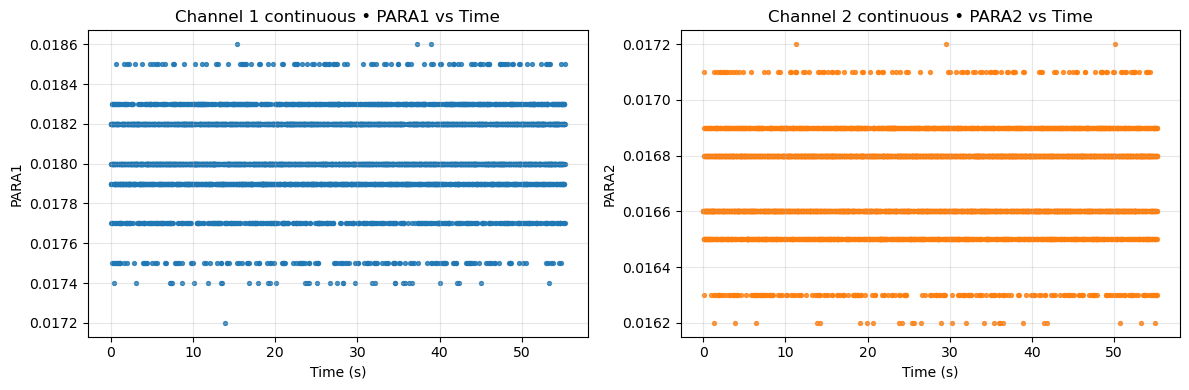

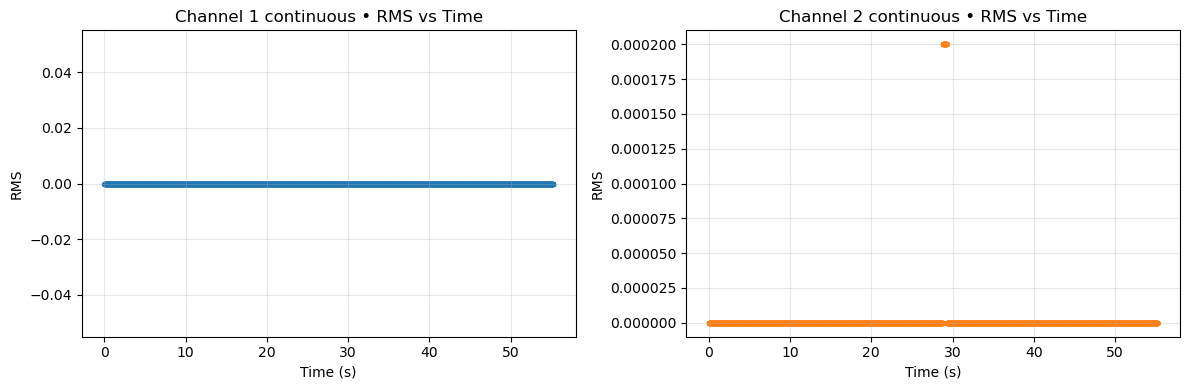

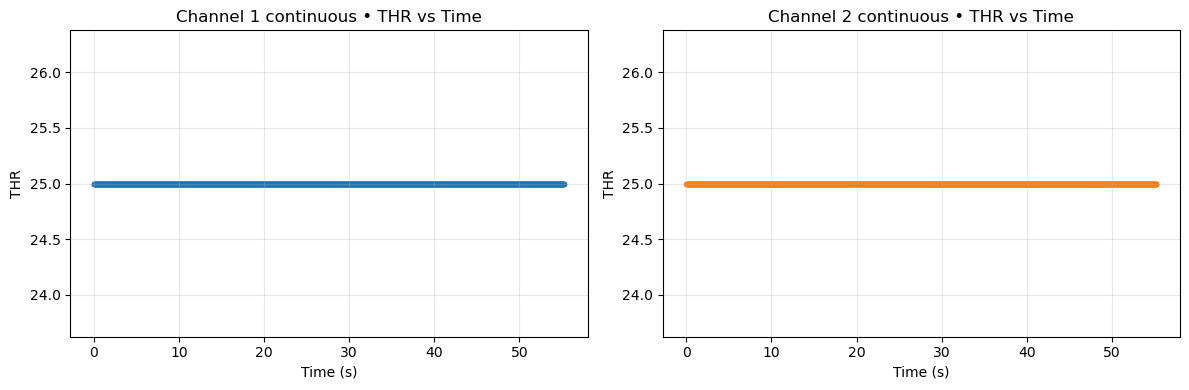

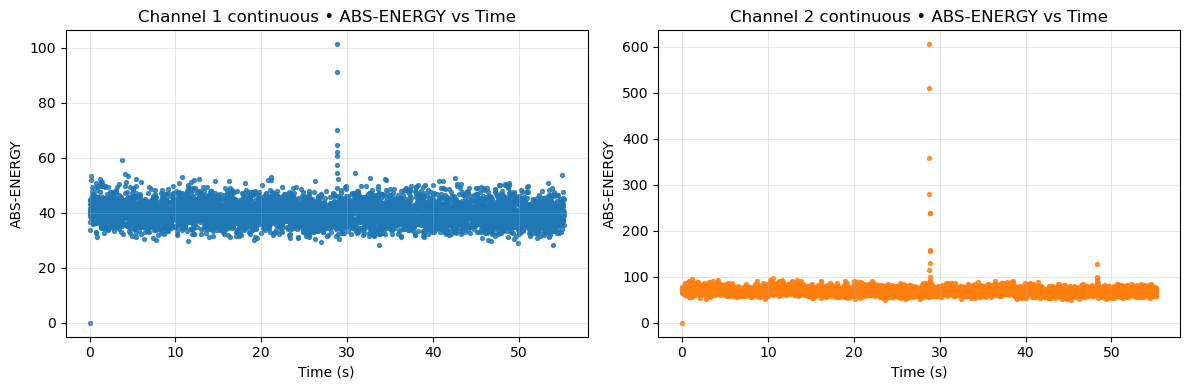

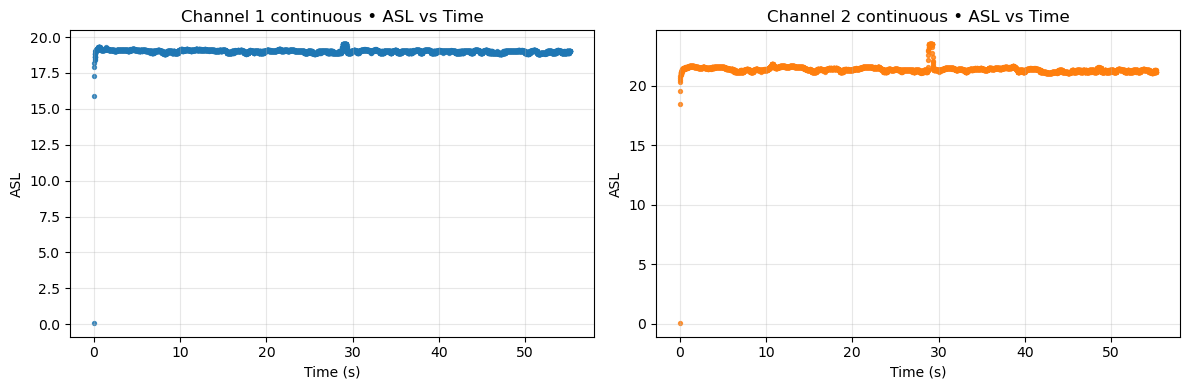

In [197]:
# === 2) Collect figures to save ===
saved_figures = []
fig_idx = 1  # serial number

time_col = "SSSSSSSS.mmmuuun"

# Metrics
metrics1 = ["PARA1","RMS","THR","ABS-ENERGY","ASL"]
metrics2 = ["PARA2","RMS","THR","ABS-ENERGY","ASL"]

# --- simple style controls (same for both) ---
POINT_SIZE = 8
POINT_COLOR_1 = "tab:blue"
POINT_COLOR_2 = "tab:orange"
MARKER = "o"

# sort time for each df
t1 = pd.to_numeric(df_time_1[time_col], errors="coerce"); o1 = np.argsort(t1.values); t1s = t1.values[o1]
t2 = pd.to_numeric(df_time_2[time_col], errors="coerce"); o2 = np.argsort(t2.values); t2s = t2.values[o2]

# plot each metric side-by-side
for col1, col2 in zip(metrics1, metrics2):
    y1 = pd.to_numeric(df_time_1[col1], errors="coerce").values[o1]
    y2 = pd.to_numeric(df_time_2[col2], errors="coerce").values[o2]

    plt.figure(figsize=(12, 4))
    # left: CH=1
    plt.subplot(1, 2, 1)
    plt.scatter(t1s, y1, s=POINT_SIZE, color=POINT_COLOR_1, marker=MARKER, alpha=0.8)
    plt.xlabel("Time (s)"); plt.ylabel(col1); plt.title(f"Channel 1 continuous • {col1} vs Time"); plt.grid(True, alpha=0.3)

    # right: CH=2
    plt.subplot(1, 2, 2)
    plt.scatter(t2s, y2, s=POINT_SIZE, color=POINT_COLOR_2, marker=MARKER, alpha=0.8)
    plt.xlabel("Time (s)"); plt.ylabel(col2); plt.title(f"Channel 2 continuous • {col2} vs Time"); plt.grid(True, alpha=0.3)

    plt.tight_layout()
    saved_figures.append((f"{fig_idx:02d}_continuous_{col1}_vs_Time_CH1_CH2", plt.gcf()))
    fig_idx += 1
    plt.show()


In [198]:
# === 3) Save all queued figures ===
for name, fig in saved_figures:
    filename = os.path.join(plots_folder_Time, f"{_safe(name)}.png")
    fig.savefig(filename, dpi=300, bbox_inches="tight")
    print("✅ Saved:", filename)

✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\CWRU\test11_twoCH_High Flow_30 gm per sec_Yes Chiller_Single Phase\25\Plot_Time\01_continuous_PARA1_vs_Time_CH1_CH2.png
✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\CWRU\test11_twoCH_High Flow_30 gm per sec_Yes Chiller_Single Phase\25\Plot_Time\02_continuous_RMS_vs_Time_CH1_CH2.png
✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\CWRU\test11_twoCH_High Flow_30 gm per sec_Yes Chiller_Single Phase\25\Plot_Time\03_continuous_THR_vs_Time_CH1_CH2.png
✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\CWRU\test11_twoCH_High Flow_30 gm per sec_Yes Chiller_Single Phase\25\Plot_Time\04_continuous_ABS-ENERGY_vs_Time_CH1_CH2.png
✅ Saved: C:\Users\mh272\Box\NED3_Share\Ishraq Hossain\CWRU\test11_twoCH_High Flow_30 gm per sec_Yes Chiller_Single Phase\25\Plot_Time\05_continuous_ASL_vs_Time_CH1_CH2.png
